#Infosys Price Prediction Using Linear Regression

Collecting Infosys stock data using Twelvedata API key

In [277]:
import requests

In [278]:
api_key = 'your_api_Key'

In [279]:
import pandas as pd

ticker = 'INFY:BSE'
interval = '1day'

api_url = f'https://api.twelvedata.com/time_series?symbol={ticker}&interval={interval}&order=ASC&outputsize=4000&apikey={api_key}'
data = requests.get(api_url).json()

data1=pd.DataFrame(data['values'])
data1

,datetime,open,high,low,close,volume
0,2005-07-15,134.37500,137.93750,133.56250,137.21249,4306400
1,2005-07-18,137.83749,142.48750,137.83749,142.01875,6351472
2,2005-07-19,142.62500,143.11874,140.63126,141.11563,2198096
3,2005-07-20,141.06250,141.87500,139.31250,139.54688,2031152
4,2005-07-21,140.50000,140.81250,137.50313,138.13437,3223216
...,...,...,...,...,...,...
3995,2021-10-08,1704.00000,1731.00000,1698.19995,1723.55005,343733
3996,2021-10-11,1678.15002,1730.30005,1663.94995,1692.00000,240721
3997,2021-10-12,1684.00000,1689.00000,1662.00000,1684.80005,313692
3998,2021-10-13,1692.00000,1713.50000,1681.30005,1708.69995,130135


Importing required Libraries

In [280]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 

Loading Data

In [281]:
data1.head()

,datetime,open,high,low,close,volume
0,2005-07-15,134.37500,137.93750,133.56250,137.21249,4306400
1,2005-07-18,137.83749,142.48750,137.83749,142.01875,6351472
2,2005-07-19,142.62500,143.11874,140.63126,141.11563,2198096
3,2005-07-20,141.06250,141.87500,139.31250,139.54688,2031152
4,2005-07-21,140.50000,140.81250,137.50313,138.13437,3223216


Convrting Object data type into Float datatype

In [282]:
data1['datetime'] = pd.to_datetime(data1.datetime)

In [283]:
data1['open']=data1['open'].astype(float)
data1['high']=data1['high'].astype(float)
data1['low']=data1['low'].astype(float)
data1['close']=data1['close'].astype(float)
data1['volume']=data1['volume'].astype(float)

In [284]:
data1.shape

(4000, 6)

In [285]:
data1.head()

,datetime,open,high,low,close,volume
0,2005-07-15,134.37500,137.93750,133.56250,137.21249,4306400.0
1,2005-07-18,137.83749,142.48750,137.83749,142.01875,6351472.0
2,2005-07-19,142.62500,143.11874,140.63126,141.11563,2198096.0
3,2005-07-20,141.06250,141.87500,139.31250,139.54688,2031152.0
4,2005-07-21,140.50000,140.81250,137.50313,138.13437,3223216.0


In [286]:
data1.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [287]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  4000 non-null   datetime64[ns]
 1   open      4000 non-null   float64       
 2   high      4000 non-null   float64       
 3   low       4000 non-null   float64       
 4   close     4000 non-null   float64       
 5   volume    4000 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 187.6 KB


In [288]:
data1.describe()

,open,high,low,close,volume
count,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03
mean,477.315980,482.552301,471.836355,477.103895,1.242580e+06
std,304.763514,307.644176,301.961275,304.760109,1.705302e+06
min,134.375000,137.937500,133.125000,137.212490,0.000000e+00
25%,277.468750,279.996872,273.125000,276.429688,3.377845e+05
50%,393.687500,397.318755,388.631255,393.859375,6.355120e+05
75%,573.000000,580.000000,566.062513,573.462495,1.481098e+06
max,1770.849980,1787.500000,1752.199950,1763.449950,2.565221e+07


In [289]:
print(len(data1))

4000


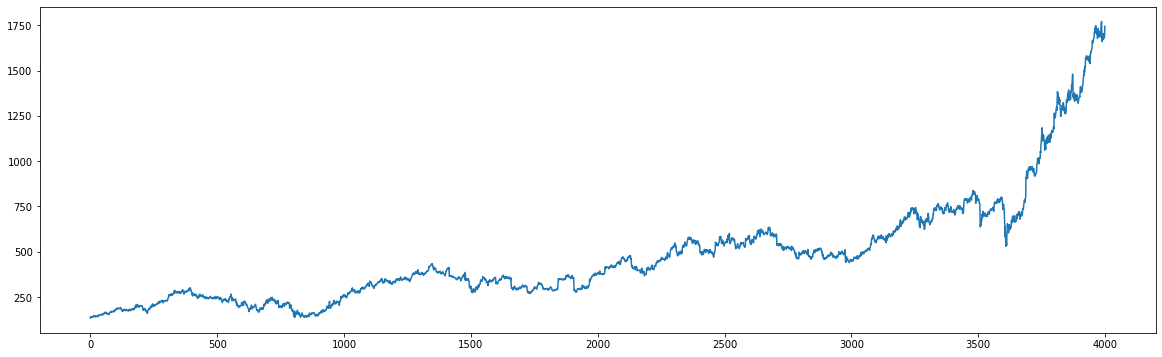

In [290]:
data1['open'].plot(figsize=(20,6))

Separate the Input and Output Columns

In [291]:
x = data1[['open', 'high', 'low', 'volume']]
y = data1['close']

Spliting the Train and Test data

In [292]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.998, random_state = 100)

In [293]:
x_train.shape

(3992, 4)

In [294]:
x_test.shape

(8, 4)

####Linear Regression Model

In [295]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
LR = LinearRegression()

Fitting the data in the Model

In [296]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [297]:
print(LR.coef_)

[-5.11943086e-01  7.42807427e-01  7.69150369e-01  1.97602977e-08]


In [298]:
print(LR.intercept_)

0.08297961024834422


Prediction

In [299]:
predicted = LR.predict(x_test)
print(predicted)

[681.08543994 159.85155289 275.70675584 420.07630793 532.69817919
 408.15736274 481.92264556 444.5559704 ]


In [300]:
predicted.shape

(8,)

In [301]:
dframe=pd.DataFrame(y_test,predicted)

In [302]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [303]:
print(dfr)

      Actual Price  Predicted Price
3218     681.45001       681.085440
883      157.29375       159.851553
367      273.95001       275.706756
2226     421.00626       420.076308
2578     531.32501       532.698179
2219     406.64999       408.157363
2911     480.85001       481.922646
2080     445.28125       444.555970


In [304]:
graph=dfr.head(20)

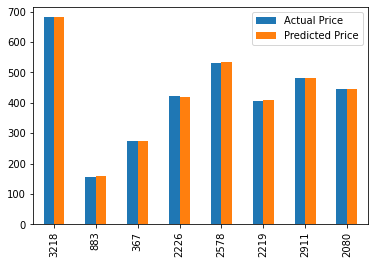

In [305]:
graph.plot(kind='bar')

In [306]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [307]:
LR.score(x_test,y_test)

0.999906173841088

In [308]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.2859409942488433
Mean Squared Error: 2.0575721886540643
Root Mean Squared Error: 1.4344239919403412
